In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('titanic.csv')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Общая характаристика

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [5]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
for column in df.columns:
    ratio_unknown = len(df[df[column].isna()]) / len(df)
    if ratio_unknown > 0:
        print(f'There are {ratio_unknown * 100:5.2f}% rows with unknown "{column}"')

There are 19.87% rows with unknown "age"
There are  0.22% rows with unknown "embarked"
There are 77.22% rows with unknown "deck"
There are  0.22% rows with unknown "embark_town"


In [7]:
df.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Анализ по полу

In [29]:
df['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [30]:
df['sex'].value_counts(normalize=True)

male      0.647587
female    0.352413
Name: sex, dtype: float64

In [31]:
df[["sex", "survived"]].groupby(['sex'], as_index=False).mean().sort_values(by='survived', ascending=False)

,sex,survived
0,female,0.742038
1,male,0.188908


In [32]:
old_men = df["adult_male"].sum()
print(f"{old_men/all_pas*100:0.4}% adult_male of all passengers")

60.27% adult_male of all passengers


# Анализ по классу

In [33]:
df.pclass.value_counts().sort_values(ascending=False)

3    491
1    216
2    184
Name: pclass, dtype: int64

<AxesSubplot:xlabel='pclass'>

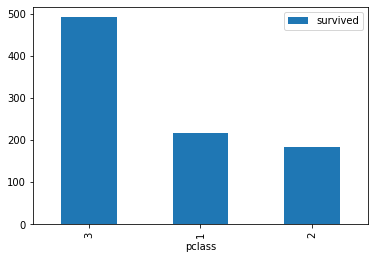

In [34]:
df[['pclass', 'survived']].groupby(['pclass']).count().sort_values(by = "survived", ascending=False).plot.bar()

In [31]:
df[['pclass', 'survived']].groupby(['pclass']).mean().sort_values(by = "survived", ascending=False)

,survived
pclass,
1,0.629630
2,0.472826
3,0.242363


# Анализ по возрасту

In [36]:
min_age = df.age.min()
max_age = df.age.max()
mean_age = df.age.mean()
print(f"min_age: {min_age}, max_age: {max_age}, mean_age: {mean_age:0.4}")

min_age: 0.42, max_age: 80.0, mean_age: 29.7


<AxesSubplot:ylabel='Density'>

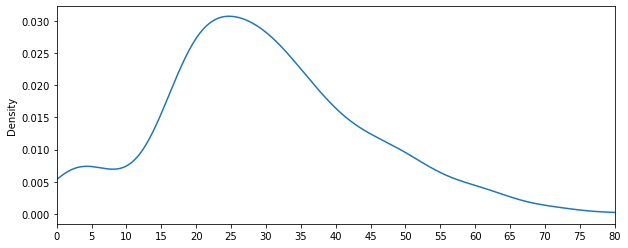

In [56]:
df.age.plot.kde(figsize = (10, 4), xlim = (0, 80), xticks = list(range(0, 85, 5)))

In [75]:
kids = df[df['age'] < 15].shape[0]
kids

78

# Анализ по цене билета

In [39]:
min_fare = df.fare.min()
max_fare = df.fare.max()
mean_fare= df.fare.mean()
print(f"min fare: {min_fare}, max fare: {max_fare}, mean fare: {mean_fare:0.4}")

min fare: 0.0, max fare: 512.3292, mean fare: 32.2


<AxesSubplot:ylabel='Density'>

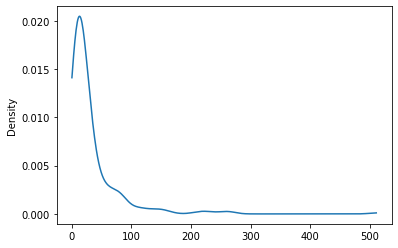

In [40]:
df.fare.plot.kde(ind=list(range(int(min_fare), int(max_fare))))

большинство билетов стоило меньше 50$

# Анализ по городу отправления

In [42]:
df.embark_town.value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [43]:
df.embark_town.value_counts(normalize=True)

Southampton    0.724409
Cherbourg      0.188976
Queenstown     0.086614
Name: embark_town, dtype: float64

# Анализ по количеству родственников

<AxesSubplot:>

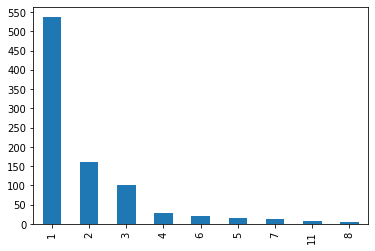

In [24]:
df['familysize'] = df['sibsp'] + df['parch'] + 1
df.familysize.value_counts().plot.bar(yticks = list(range(0, 600, 50)))

In [34]:
df[['familysize', 'survived']].groupby(['familysize']).sum().sort_values(by='survived', ascending=False)

,survived
familysize,
1,163
2,89
3,59
4,21
7,4
5,3
6,3
8,0
11,0


In [35]:
df[['familysize', 'survived']].groupby(['familysize']).mean().sort_values(by='survived', ascending=False)

,survived
familysize,
4,0.724138
3,0.578431
2,0.552795
7,0.333333
1,0.303538
5,0.200000
6,0.136364
8,0.000000
11,0.000000


# Только выжившие


In [9]:
survived = df[df['survived'] == True]
survived.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [10]:
survived.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,342.0,342.000000,342,290.000000,342.000000,342.000000,342.000000,340,342,342,342,136,340,342,342
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,1,2
top,NaN,NaN,female,NaN,NaN,NaN,NaN,S,First,woman,False,C,Southampton,yes,False
freq,NaN,NaN,233,NaN,NaN,NaN,NaN,217,136,205,254,35,217,342,179
mean,1.0,1.950292,NaN,28.343690,0.473684,0.464912,48.395408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,0.863321,NaN,14.950952,0.708688,0.771712,66.596998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.0,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.0,1.000000,NaN,19.000000,0.000000,0.000000,12.475000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.0,2.000000,NaN,28.000000,0.000000,0.000000,26.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.0,3.000000,NaN,36.000000,1.000000,1.000000,57.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


средняя стоимость билета увеличилась

<AxesSubplot:ylabel='Density'>

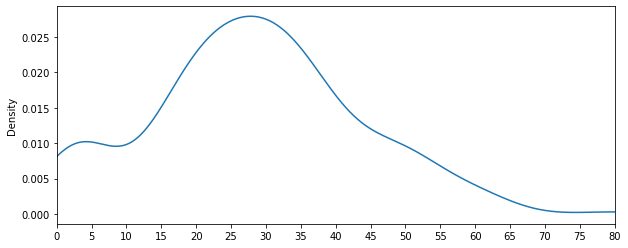

In [11]:
survived.age.plot.kde(figsize = (10, 4), xlim = (0, 80), xticks = list(range(0, 85, 5)))

распределение по возрасту почти не изменилось

In [80]:
survived_kids = survived[survived['age'] < 15].shape[0]
print(survived_kids)
print(f"{survived_kids / kids * 100:0.4}% of all kids survived")

45
57.69% of all kids survived


In [74]:
all_survived = survived.shape[0]
old_men = survived["adult_male"].sum()
print(f"{old_men/all_survived*100:0.4}% adult male of survived passengers")

25.73% adult male of survived passengers


In [13]:
survived.sex.value_counts()

female    233
male      109
Name: sex, dtype: int64

In [14]:
survived.sex.value_counts(normalize=True) 

female    0.681287
male      0.318713
Name: sex, dtype: float64

среди выживших теперь большиство женщин

<AxesSubplot:ylabel='Density'>

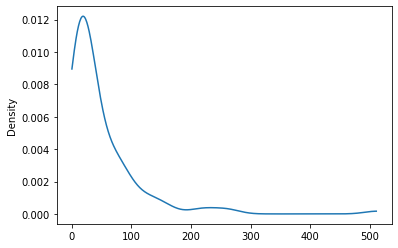

In [58]:
min_fare = survived.fare.min()
max_fare = survived.fare.max()
survived.fare.plot.kde(ind=list(range(int(min_fare), int(max_fare))))

стало больше дорогих билетом

In [50]:
survived.embark_town.value_counts(normalize=True)

Southampton    0.638235
Cherbourg      0.273529
Queenstown     0.088235
Name: embark_town, dtype: float64

процент жителей Cherbourg среди выживших повысился, жителей Southampton понизился, а жителей Queenstown почти не изменился

<AxesSubplot:>

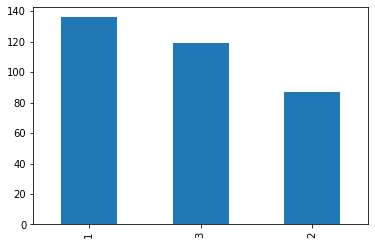

In [51]:
survived.pclass.value_counts().plot.bar()

большинство выжишвих было в 1-м классе

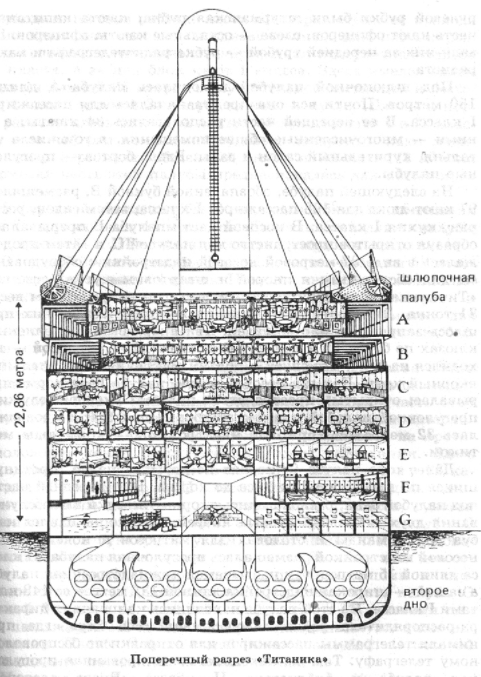

In [54]:
survived.deck.value_counts()

C    35
B    35
D    25
E    24
F     8
A     7
G     2
Name: deck, dtype: int64

на палубах B, C, D, E было больше всего выживших

<AxesSubplot:xlabel='pclass,deck'>

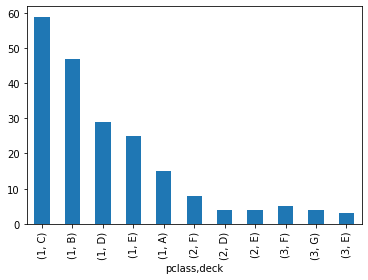

In [62]:
df[['pclass', 'deck']].groupby(['pclass']).value_counts().plot.bar()

Палубы A, B, C, D, E были заняты первым классом

# Среднестатистический выживший


Среднестатистический выживший - женщина 28 лет, которая купила билет во второй класс за 48$ и у которой 1 родственник с собой

# Итоги

1. причина, почему женщины и дети больше выживали, возможно, в том, что им уступали места на спасательных шлюпках
2. пассажиры первого класса выживали больше, возможно, потому что их палубы находилась ближе к спасательным шлюпкам или у них были отдельные шлюпки